In [184]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
library(zoo)
theme_set(theme_prism(base_size=20))
options(repr.plot.width=15, repr.plot.height=15)
source("R/plot.R")
source("R/Cbind.R")

This notebook reads the IDOC results stored in "IDOC_METHODS_PAPER_METADATA.xlsx" and produces a csv file with the data in tidy format

* Fly_group_experiment_treatment: experimental information of the fly 
* fly_name_reference: unique animal identifier, built as follows: date_time(scientist_suffix)_ROI_X
* experiment: type of memory evaluated (20min STM, 1h STM, LTM, LTM CHX, ...)
* id
* test: (PI is read PRE or POST conditioning)
* PI: (value of PI)
* Training_session: how many times CS-US pairing is presented
* Genotype: genotype of the fly
* interval: NONE, or ZTX-ZTY if the fly was SD'd between ZT X and ZT Y
* ZT4,ZT4.5,ZT5,ZT5.5,ZT6,ZT6.5,ZT7,ZT7.5,ZT8,ZT8.5,ZT9,ZT9.5,ZT10,ZT10.5,ZT11,ZT11.5,ZT12,ZT12.5,ZT13,ZT13.5,ZT14,ZT14.5,ZT15,ZT15.5,ZT16,ZT16.5,ZT17,ZT17.5,ZT18,ZT18.5,ZT19,ZT19.5,ZT20,ZT20.5,ZT21,ZT21.5,ZT22,ZT22.5,ZT23,ZT23.5,ZT24,ZT24.5,ZT25,ZT25.5,ZT26,ZT26.5,ZT27,ZT27.5,ZT28,ZT28.5,ZT29,ZT29.5,ZT30
* ZT4_interactions,ZT4.5_interactions,ZT5_interactions,ZT5.5_interactions,ZT6_interactions,ZT6.5_interactions,ZT7_interactions,ZT7.5_interactions,ZT8_interactions,ZT8.5_interactions,ZT9_interactions,ZT9.5_interactions,ZT10_interactions,ZT10.5_interactions,ZT11_interactions,ZT11.5_interactions,ZT12_interactions,ZT12.5_interactions,ZT13_interactions,ZT13.5_interactions,ZT14_interactions,ZT14.5_interactions,ZT15_interactions,ZT15.5_interactions,ZT16_interactions,ZT16.5_interactions,ZT17_interactions,ZT17.5_interactions,ZT18_interactions,ZT18.5_interactions,ZT19_interactions,ZT19.5_interactions,ZT20_interactions,ZT20.5_interactions,ZT21_interactions,ZT21.5_interactions,ZT22_interactions,ZT22.5_interactions,ZT23_interactions,ZT23.5_interactions,ZT24_interactions,ZT24.5_interactions,ZT25_interactions,ZT25.5_interactions,ZT26_interactions,ZT26.5_interactions,ZT27_interactions,ZT27.5_interactions,ZT28_interactions,ZT28.5_interactions,ZT29_interactions,ZT29.5_interactions,ZT30_interactions
User


In [185]:
idoc_dir <- "/idoc_data/results/IDOC/"
source("link_idoc_metadata.R")
source("library.R")


In [186]:
database <- "/idoc_data/paper/CHuiData.ods"
sheets <- readODS::list_ods_sheets(database)
columns <- c(
    "Files", "Genotype", "ROI", "Gender", "Age", "ATR", "Training",
    "Odor", "Sugar", "Electric shock",  "PRE", "PRE_1", "PRE_2", "POST", "POST_1", "POST_2", "Keep",
    "fly_name_reference", "experiment"
)
metadata_ch <- read_idoc_metadata(file = database, sheets=sheets, columns = columns, backend=readODS::read_ods)
metadata_ch$SD_quality <- "No_sleep_depriver"
metadata_ch$SD_quality_second_eye <- "No_sleep_depriver"
metadata_ch$interactor_time_window <- "No_stimulator"
metadata_ch$interactor <- "No_stimulator"
metadata_ch$`comment on SD` <- NA
metadata_ch$User <- "CH"
metadata_ch$region_id <- "NONE"

Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs intr

In [187]:
table(metadata_ch$experiment)


         20min STM 20min STM unpaired           24hr LTM       24hr LTM CHX 
               210                100                247                130 

In [188]:
database <- "idoc_metadata.ods"
sheets <- c("20min_STM", "1hr_STM", "3hr_STM")
source("library.R")
columns <- c(
    "Files", "Genotype", "ROI", "User", "fly_name_reference", "Gender", "Age", "ATR", "Training",
    "Odor", "Sugar", "Electric shock",  "PRE", "PRE_1", "PRE_2", "POST", "POST_1", "POST_2", "Keep",
    "SD_quality", "SD_quality_second_eye", "interactor_time_window", "interactor", "comment on SD", "experiment"
)

## Read STM experiments

In [189]:
metadata_stm <- read_idoc_metadata(file = database, sheets=sheets, columns = columns, backend=readODS::read_ods)
metadata_stm$region_id <- "NONE"

Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“Deleting 21 42 63 82 103 124 145 166 rows from metadata”
Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“Deleting 21 42 63 rows from metadata”
Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“Deleting 21 42 63 84 105 126 rows from metadata”


In [190]:
metadata_ltm <- read_idoc_metadata(file = database, sheets=c("24hr_LTM"), columns = c(columns, "region_id"), backend=readODS::read_ods)
metadata_ltm <- metadata_ltm[SD_quality %in% c("No_sleep_depriver", "good") & SD_quality_second_eye %in% c("No_sleep_depriver", "good"),]

Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NAs introduced by coercion”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NAs introduced by coercion”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“Deleting 20 38 58 79 100 117 128 139 150 161 172 183 194 205 216 227 238 249 259 270 281 292 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 357 368 379 390 401 rows from metadata”


In [191]:
metadata_gtacr <- read_idoc_metadata(file = database, sheets=c("24hr_LTM_GTACR"), columns =  c(columns, "region_id"), backend=readODS::read_ods)

Warning message in as.Date(as.integer(dt$Files), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NAs introduced by coercion”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“NAs introduced by coercion”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“Deleting 11 22 33 44 55 66 rows from metadata”


In [192]:
metadata <- rbind(metadata_stm, metadata_ltm, metadata_gtacr, metadata_ch)

In [193]:
metadata_linked <- link_idoc_metadata(metadata, result_dir="/idoc_data/IDOC")
n_missing_animals <- nrow(metadata_linked[is.na(idoc_folder),])
if (n_missing_animals>0) {
    warning(paste(n_missing_animals, "animals could not be linked"))
}

1 hit found for 1hr_STM/2023-07-10_16-10-48(ET_1h)

1 hit found for 1hr_STM/2023-07-17_16-23-00(ET_1h)

1 hit found for 1hr_STM/2023-07-19_15-04-46(ET_1h)

1 hit found for 1hr_STM/2023-09-12_15-08-10(ET_1hr_STM)

1 hit found for 20min_STM/2023-07-04_14-43-40(ET_20m)

1 hit found for 20min_STM/2023-07-04_16-18-01(ESB-20min)

1 hit found for 20min_STM/2023-07-05_14-30-11(ET_20m)

1 hit found for 20min_STM/2023-07-06_15-39-25(ET_20m)

1 hit found for 20min_STM/2023-07-19_16-02-41(ET_20min)

1 hit found for 20min_STM/2023-08-08_17-59-40(ET_20min)

1 hit found for 20min_STM/2023-09-11_14-51-46(ET_STM20min_Dunc_vs_Iso)

1 hit found for 20min_STM/2023-09-16_15-39-06_AOJ_Learning_dunc

1 hit found for 20min_STM/2023-09-18_16-19-26(ET_STM_DuncIso31)

1 hit found for 24hr_LTM/2023-07-12_14-25-09(ET_spaced_overnight)

1 hit found for 24hr_LTM/2023-07-13_16-05-32(ET_spaced_overnight)

1 hit found for 24hr_LTM/2023-07-18_15-25-46(ET_LTM_spaced)

1 hit found for 24hr_LTM/2023-07-23_16-20-43(ESB-mass

In [197]:
table(metadata_linked$region_id)


   1   10   11   12   13   14   15   16   17   18   19    2   20    3    4    5 
  32    6    3   24    3   26    3   27    3   22    4    6   22   31    4   30 
   6    7    8    9 NONE 
   5   30    6   28 1085 

In [202]:
metadata_linked[Training=="6X_Spaced" & interactor_time_window=="No_stimulator" & region_id != "NONE" & !is.na(PRE) & !is.na(POST)]

Files,sheet,Genotype,ROI,User,fly_name_reference,Gender,Age,ATR,Training,⋯,SD_quality_second_eye,interactor_time_window,interactor,comment on SD,experiment,row_number,region_id,folder__,sheet__,idoc_folder
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,Iso31,1,ET,2023-07-12_14-25-09(ET_spaced_overnight)_ROI_1,FALSE,4,N,6X_Spaced,⋯,No_sleep_depriver,No_stimulator,DefaultStimulator,NA,24hr LTM,1,1,2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,/idoc_data/IDOC/2023-07-idoc_data/2023-07-12_14-25-09(ET_spaced_overnight)
2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,Iso31,2,ET,2023-07-12_14-25-09(ET_spaced_overnight)_ROI_2,FALSE,4,N,6X_Spaced,⋯,No_sleep_depriver,No_stimulator,DefaultStimulator,NA,24hr LTM,2,2,2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,/idoc_data/IDOC/2023-07-idoc_data/2023-07-12_14-25-09(ET_spaced_overnight)
2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,Iso31,3,ET,2023-07-12_14-25-09(ET_spaced_overnight)_ROI_3,FALSE,4,N,6X_Spaced,⋯,No_sleep_depriver,No_stimulator,DefaultStimulator,NA,24hr LTM,3,3,2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,/idoc_data/IDOC/2023-07-idoc_data/2023-07-12_14-25-09(ET_spaced_overnight)
2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,Iso31,4,ET,2023-07-12_14-25-09(ET_spaced_overnight)_ROI_4,FALSE,4,N,6X_Spaced,⋯,No_sleep_depriver,No_stimulator,DefaultStimulator,NA,24hr LTM,4,4,2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,/idoc_data/IDOC/2023-07-idoc_data/2023-07-12_14-25-09(ET_spaced_overnight)
2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,Iso31,5,ET,2023-07-12_14-25-09(ET_spaced_overnight)_ROI_5,FALSE,4,N,6X_Spaced,⋯,No_sleep_depriver,No_stimulator,DefaultStimulator,NA,24hr LTM,5,5,2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,/idoc_data/IDOC/2023-07-idoc_data/2023-07-12_14-25-09(ET_spaced_overnight)
2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,Iso31,6,ET,2023-07-12_14-25-09(ET_spaced_overnight)_ROI_6,FALSE,4,N,6X_Spaced,⋯,No_sleep_depriver,No_stimulator,DefaultStimulator,NA,24hr LTM,6,6,2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,/idoc_data/IDOC/2023-07-idoc_data/2023-07-12_14-25-09(ET_spaced_overnight)
2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,Iso31,7,ET,2023-07-12_14-25-09(ET_spaced_overnight)_ROI_7,FALSE,4,N,6X_Spaced,⋯,No_sleep_depriver,No_stimulator,DefaultStimulator,NA,24hr LTM,7,7,2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,/idoc_data/IDOC/2023-07-idoc_data/2023-07-12_14-25-09(ET_spaced_overnight)
2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,Iso31,8,ET,2023-07-12_14-25-09(ET_spaced_overnight)_ROI_8,FALSE,4,N,6X_Spaced,⋯,No_sleep_depriver,No_stimulator,DefaultStimulator,NA,24hr LTM,8,8,2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,/idoc_data/IDOC/2023-07-idoc_data/2023-07-12_14-25-09(ET_spaced_overnight)
2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,Iso31,9,ET,2023-07-12_14-25-09(ET_spaced_overnight)_ROI_9,FALSE,4,N,6X_Spaced,⋯,No_sleep_depriver,No_stimulator,DefaultStimulator,NA,24hr LTM,9,9,2023-07-12_14-25-09(ET_spaced_overnight),24hr_LTM,/idoc_data/IDOC/2023-07-idoc_data/2023-07-12_14-25-09(ET_spaced_overnight)


In [155]:
metadata_linked <- metadata_linked[!is.na(idoc_folder),]
metadata_linked[, PRE_manual := PRE]
metadata_linked[, POST_manual := POST]

In [195]:
table(metadata_linked$interactor_time_window)


No_stimulator          NONE     ZT05-ZT11     ZT05-ZT24   ZT12-ZT14.5 
          788           398           116            28             9 
    ZT12-ZT18 
           61 

In [157]:
# for (experiment in unique(metadata_linked$idoc_folder)) {
#     sessions <- sort(list.dirs(experiment, recursive = F, full.names = F))
#     n_sessions <- length(sessions)
#     if (n_sessions == 3) {
#         session_data <- list(
#             pre=sessions[1],
#             train_1=sessions[2],
#             post=sessions[3]
#         )
#         path <- file.path(experiment, "sessions.yaml")
#         print(paste(n_sessions, path))
#         yaml::write_yaml(file = path, x = session_data)
#     } else if (n_sessions == 4) {
#         session_data <- list(
#             pre=sessions[1],
#             train_1=sessions[2],
#             post_1=sessions[3],
#             post_2=sessions[4]
#         )
#         path <- file.path(experiment, "sessions.yaml")
#         print(paste(n_sessions, path))
#         yaml::write_yaml(file = path, x = session_data)
#     } else if (n_sessions==8) {
#         session_data <- list(
#             pre=sessions[1],
#             train_1=sessions[2],
#             train_2=sessions[3],
#             train_3=sessions[4],
#             train_4=sessions[5],
#             train_5=sessions[6],
#             train_6=sessions[7],
#             post=sessions[8]           
#         )
#         path <- file.path(experiment, "sessions.yaml")
#         print(paste(n_sessions, path))
#         yaml::write_yaml(file = path, x = session_data)
#     } else if (n_sessions==9) {
#         session_data <- list(
#             pre=sessions[1],
#             train_1=sessions[2],
#             train_2=sessions[3],
#             train_3=sessions[4],
#             train_4=sessions[5],
#             train_5=sessions[6],
#             train_6=sessions[7],
#             post_1=sessions[8],
#             post_2=sessions[9]            
#         )
#         path <- file.path(experiment, "sessions.yaml")
#         print(paste(n_sessions, path))
#         yaml::write_yaml(file = path, x = session_data)        
#     } else if (n_sessions==10) {
#         session_data <- list(
#             pre=sessions[1],
#             train_1=sessions[2],
#             train_2=sessions[3],
#             train_3=sessions[4],
#             train_4=sessions[5],
#             train_5=sessions[6],
#             train_6=sessions[7],
#             post_1=sessions[8],
#             post_2=sessions[9],
#             post_3=sessions[10]
            
#         )
#         path <- file.path(experiment, "sessions.yaml")
#         print(paste(n_sessions, path))
#         yaml::write_yaml(file = path, x = session_data)        
#     } else {
#         print(paste(n_sessions, experiment, "Sessions: ", paste(sessions, collapse=" ")))
#     }
# }

In [158]:
source("library.R")
# use raw csv
data <- load_idoc_data(metadata_linked, min_exits=3, trials=1:2)
# use chui annotation in excel file
# data <- data.table::copy(metadata_linked)

In [159]:
hits <- data[, .(Files, idoc_folder, User, PRE_found=sapply(PRE_files, function(x) {!any(is.na(x))}), POST_found=sapply(POST_files, function(x) {!any(is.na(x))}))]

In [160]:
hits[, .N, by=.(POST_found, User)][order(POST_found),]

POST_found,User,N
<lgl>,<chr>,<int>
FALSE,CH,667
TRUE,CH,20
TRUE,ESB,120
TRUE,ET,532
TRUE,AOJ,40
TRUE,ET_AOJ,21


In [161]:
hits[, .N, by=.(PRE_found, User)][order(PRE_found),]

PRE_found,User,N
<lgl>,<chr>,<int>
FALSE,CH,687
TRUE,ESB,120
TRUE,ET,532
TRUE,AOJ,40
TRUE,ET_AOJ,21


In [162]:
data[, .(Files, idoc_folder, sheet, ROI, PRE, PRE_1, PRE_1_manual, PRE_2, PRE_2_manual, POST_1, POST_1_manual, POST_2, POST_2_manual)]

Files,idoc_folder,sheet,ROI,PRE,PRE_1,PRE_1_manual,PRE_2,PRE_2_manual,POST_1,POST_1_manual,POST_2,POST_2_manual
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
2021-09-30 (CH),/idoc_data/IDOC/2021-09-idoc_data/2021-09-30 (CH),KC_Odor_learning,1,NaN,NA,NA,NA,NA,NA,NA,NA,NA
2021-09-30 (CH),/idoc_data/IDOC/2021-09-idoc_data/2021-09-30 (CH),KC_Odor_learning,2,NaN,NA,0.14,NA,-0.2,NA,NA,NA,NA
2021-09-30 (CH),/idoc_data/IDOC/2021-09-idoc_data/2021-09-30 (CH),KC_Odor_learning,3,NaN,NA,0.71,NA,-0.14,NA,0.33,NA,-1
2021-09-30 (CH),/idoc_data/IDOC/2021-09-idoc_data/2021-09-30 (CH),KC_Odor_learning,4,NaN,NA,0,NA,0,NA,-1,NA,-0.67
2021-09-30 (CH),/idoc_data/IDOC/2021-09-idoc_data/2021-09-30 (CH),KC_Odor_learning,5,NaN,NA,-0.14,NA,0.25,NA,0.2,NA,0.14
2021-09-30 (CH),/idoc_data/IDOC/2021-09-idoc_data/2021-09-30 (CH),KC_Odor_learning,6,NaN,NA,0.6,NA,-0.2,NA,-0.33,NA,-0.33
2021-09-30 (CH),/idoc_data/IDOC/2021-09-idoc_data/2021-09-30 (CH),KC_Odor_learning,7,NaN,NA,0,NA,0,NA,-0.2,NA,-0.33
2021-09-30 (CH),/idoc_data/IDOC/2021-09-idoc_data/2021-09-30 (CH),KC_Odor_learning,8,NaN,NA,-0.14,NA,0,NA,-0.5,NA,NA
2021-09-30 (CH),/idoc_data/IDOC/2021-09-idoc_data/2021-09-30 (CH),KC_Odor_learning,9,NaN,NA,0,NA,-0.11,NA,0.33,NA,0.33


In [163]:
data[,PRE_machine := PRE]
data[,PRE_1_machine := PRE_1]
data[,PRE_2_machine := PRE_2]
data[,POST_machine := PRE]
data[,POST_1_machine := POST_1]
data[,POST_2_machine := POST_2]

In [164]:
data[, PRE := PRE_manual]
data[, POST := POST_manual]

In [165]:
# cheat_flies <- data[(is.na(PRE) & ! is.na(PRE_manual)) | (is.na(POST) & ! is.na(POST_manual))  , .(idoc_folder, experiment, ROI, Genotype, PRE_n_exits, POST_n_exits, PRE, PRE_manual, POST, POST_manual)]
# cheat_flies

In [166]:
data_raw <- data.table::copy(data)


In [167]:
data<-data_raw[!is.na(POST) & !is.na(PRE),]

In [168]:
data[Genotype=="orb2", .N, by=experiment]

experiment,N
<chr>,<int>
20min STM,21
24hr LTM,22


In [169]:
# data_raw[Genotype=="orb2", .(Files, idoc_folder, sheet, PRE, POST)]

In [170]:
data<-data[abs(PRE)<=0.1,]

In [171]:
data[Genotype=="orb2", .N, by=experiment]

experiment,N
<chr>,<int>
20min STM,19
24hr LTM,20


In [172]:
counts <- data[, .N, by=fly_name_reference]

In [173]:
data[SD_quality=="No_sleep_depriver", SD_quality := "NONE"]
data[SD_quality_second_eye=="No_sleep_depriver", SD_quality_second_eye := "NONE"]

In [174]:
table(data$SD_quality)


   good    NONE unknown 
     55     441      45 

In [175]:
data[interactor_time_window=="No_stimulator", interactor_time_window := "NONE"]
data[, SD_status := "NONE"]
data[interactor_time_window!="NONE" & !(SD_quality == "good" & SD_quality_second_eye == "good"), SD_status := "bad"]


In [176]:
data[SD_quality == "good" & SD_quality_second_eye == "good", SD_status := "good"]
data[SD_quality == "unknown" & SD_quality_second_eye == "unknown", SD_status := "unknown"]

In [177]:
unique(data[, .(interactor_time_window, SD_quality, SD_quality_second_eye, SD_status)])

interactor_time_window,SD_quality,SD_quality_second_eye,SD_status
<chr>,<chr>,<chr>,<chr>
NONE,NONE,NONE,NONE
ZT05-ZT11,unknown,unknown,unknown
ZT05-ZT24,good,good,good
ZT12-ZT18,good,good,good
ZT05-ZT11,good,good,good


In [178]:
data[, SD_quality := NULL]
data[, SD_quality_second_eye := NULL]

In [179]:
data[ , interval := interactor_time_window]
data[ , interactor_time_window := NULL]


In [180]:
data[, id := 1:.N]


In [181]:
table(data$User)


   AOJ     CH    ESB     ET ET_AOJ 
     4    295     81    150     11 

In [182]:
data_long <- melt(data = data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")
data.table::fwrite(x = data_long, file = "tidy_data.csv")
data.table::fwrite(x = data, file = "tidy_data_wide.csv")


remove all flies that don't have a PRE and POST

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


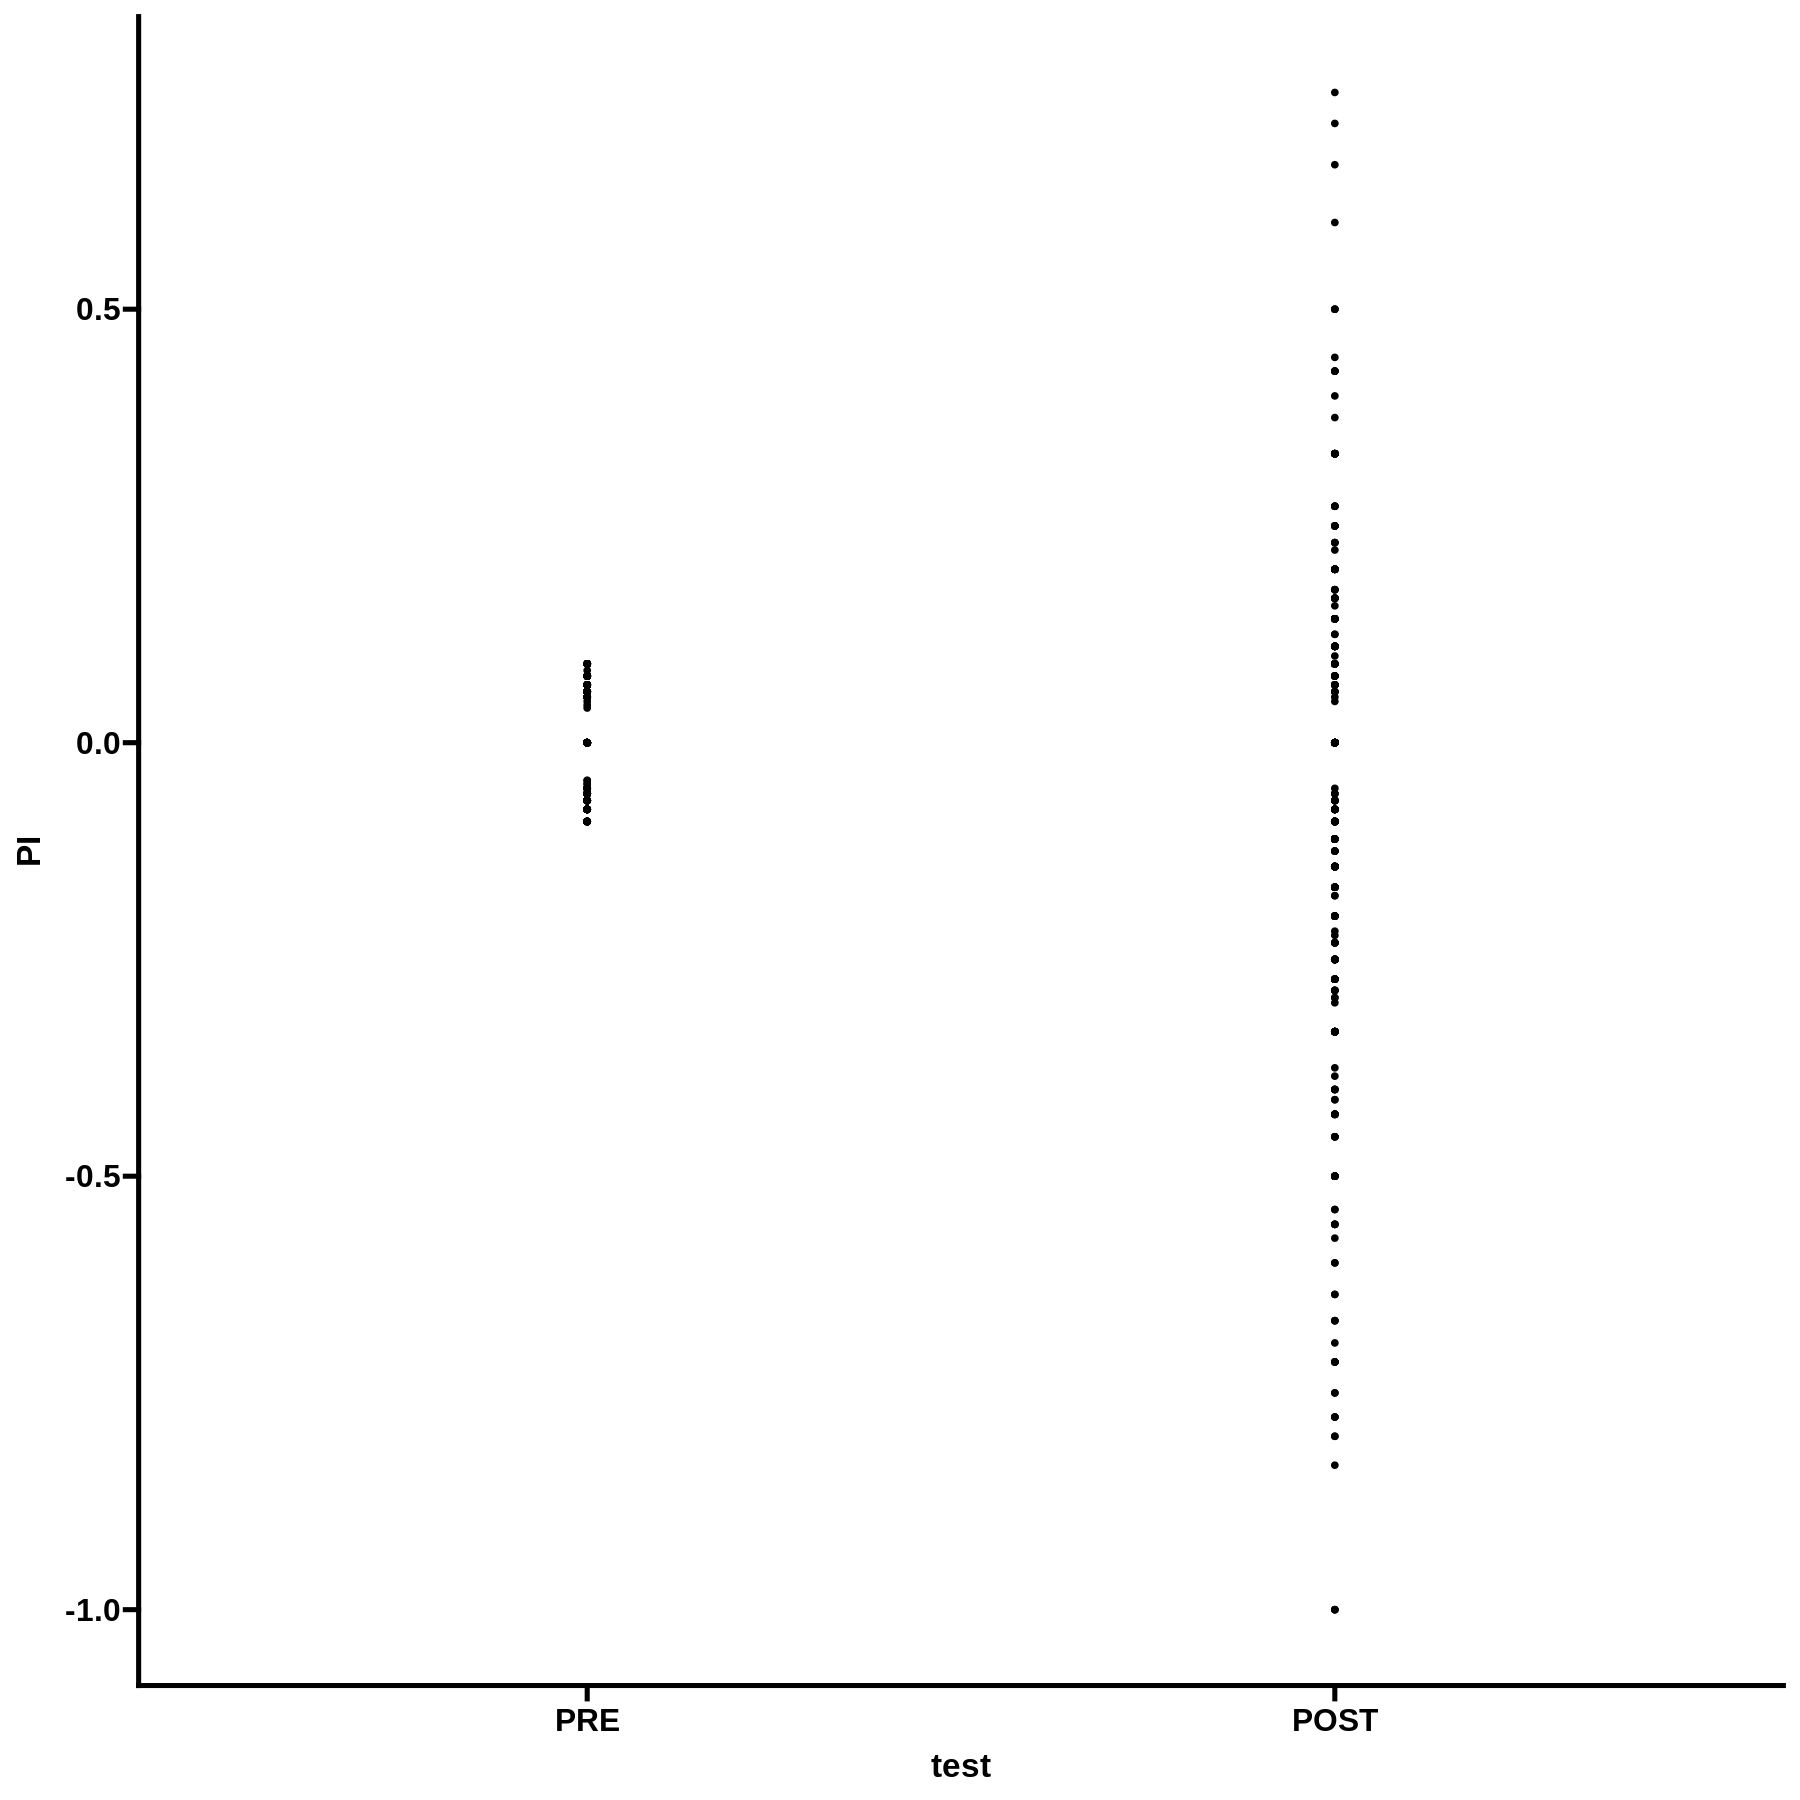

In [337]:
ggplot(data=data_long, aes(x=test, y=PI)) + geom_point()